In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore", message="invalid value encountered in greater")
warnings.filterwarnings("ignore", message="invalid value encountered in less")
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import preprocessing
from itertools import combinations

import os

df = pd.read_csv('/kaggle/input/home-data-for-ml-course/train.csv')
test_set  = pd.read_csv('/kaggle/input/home-data-for-ml-course/test.csv')
y = df.SalePrice

# Visualising numerical data with scatter plots

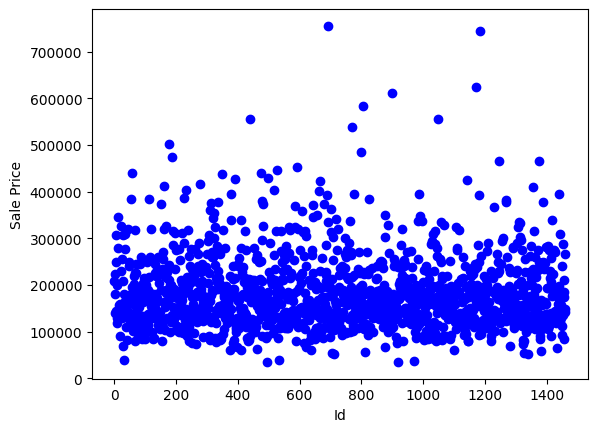

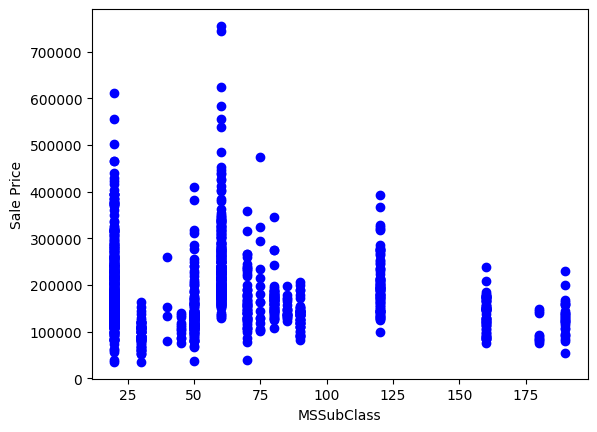

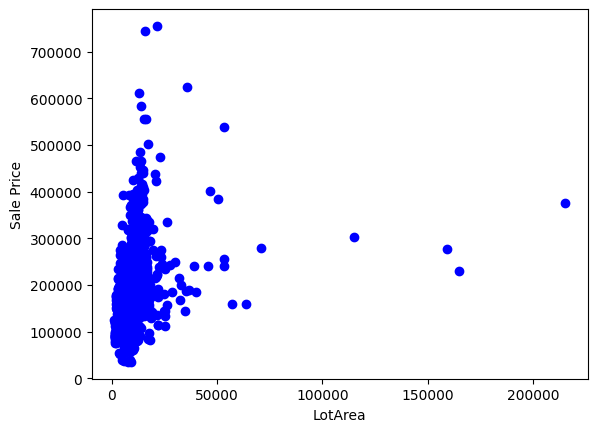

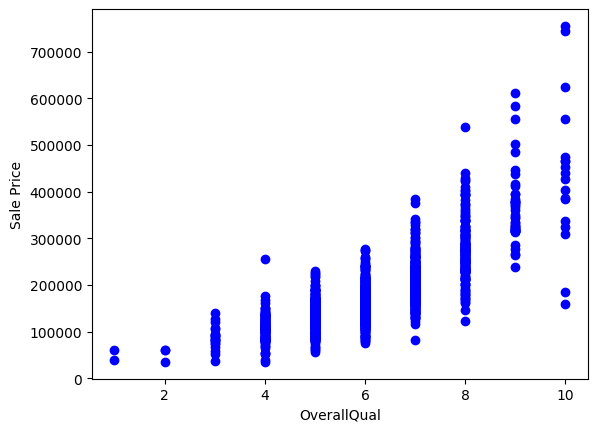

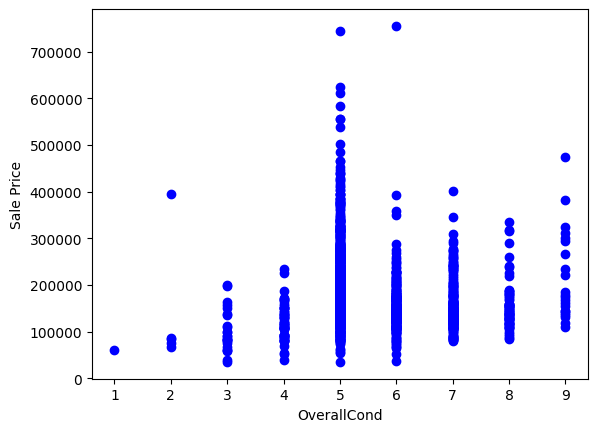

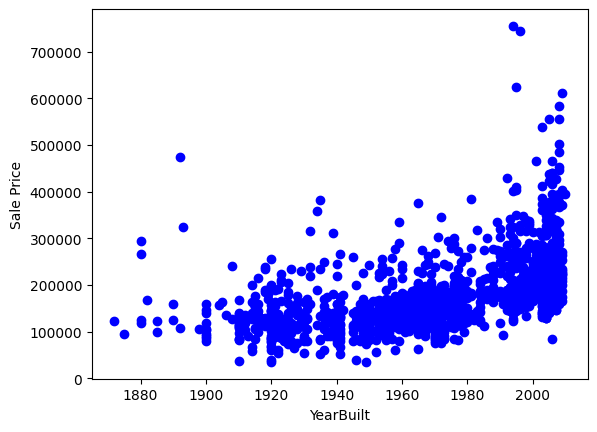

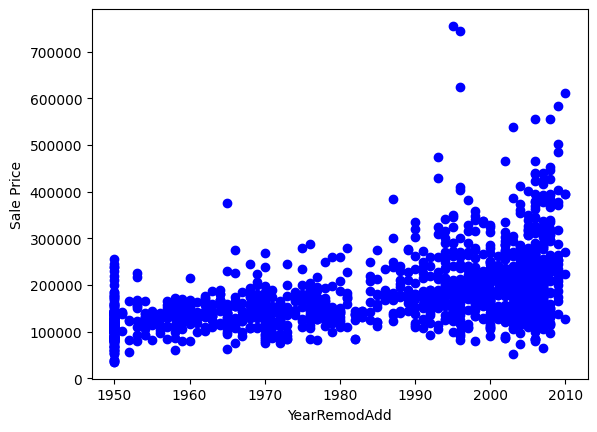

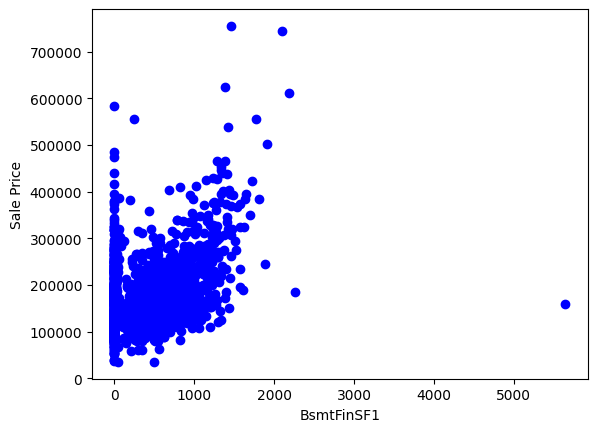

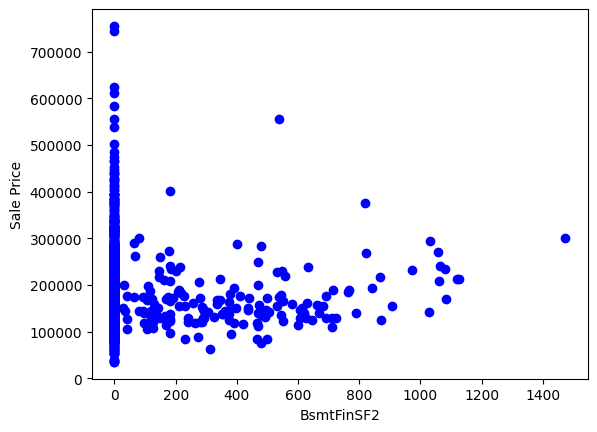

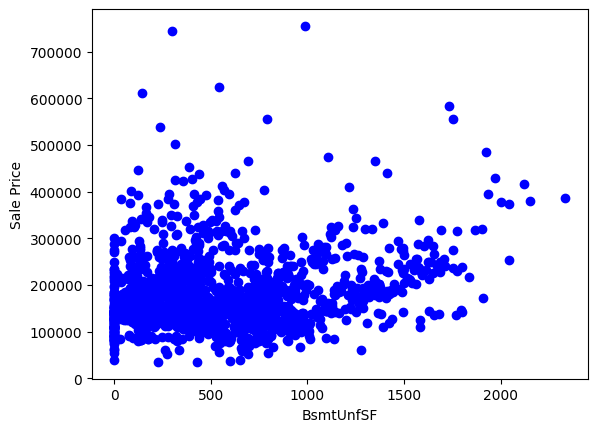

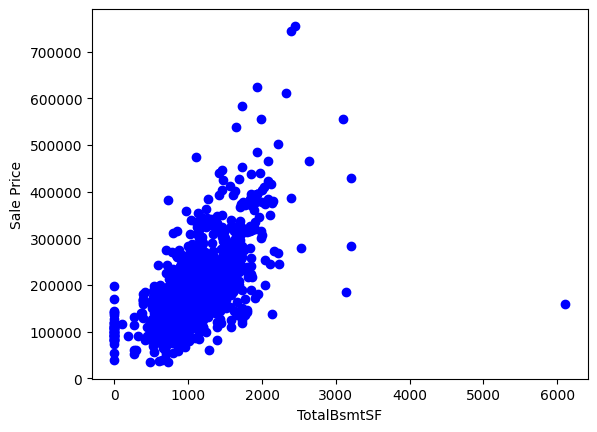

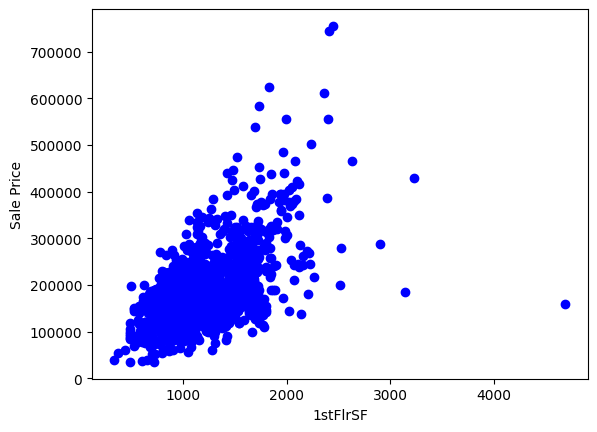

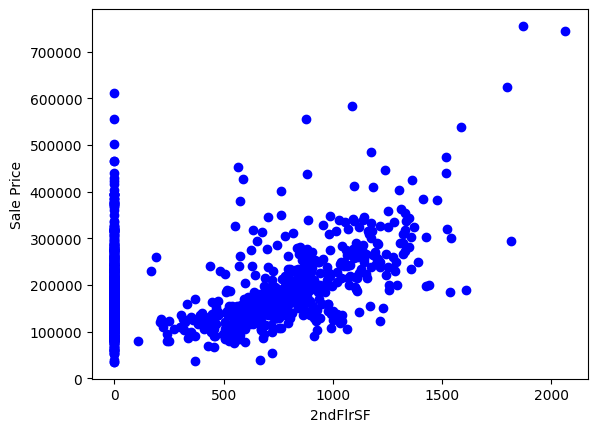

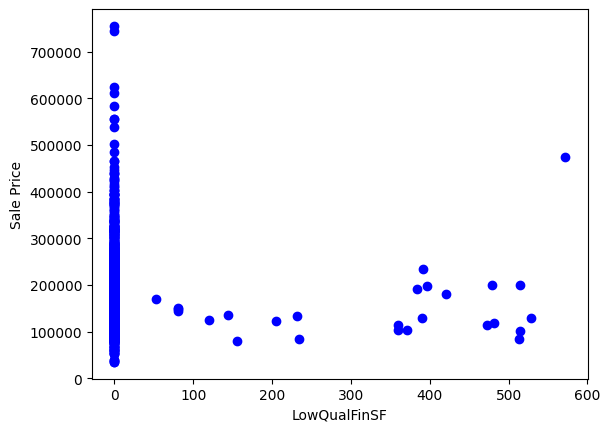

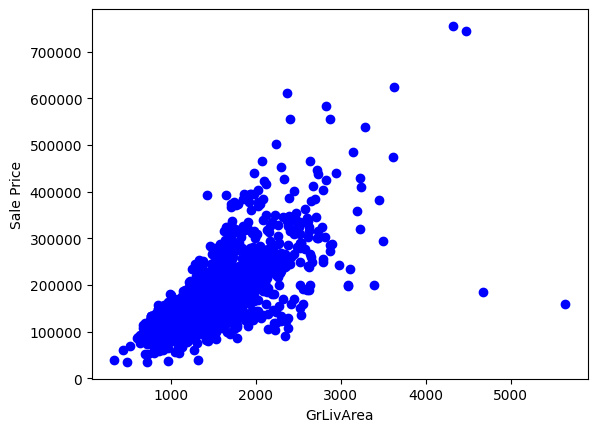

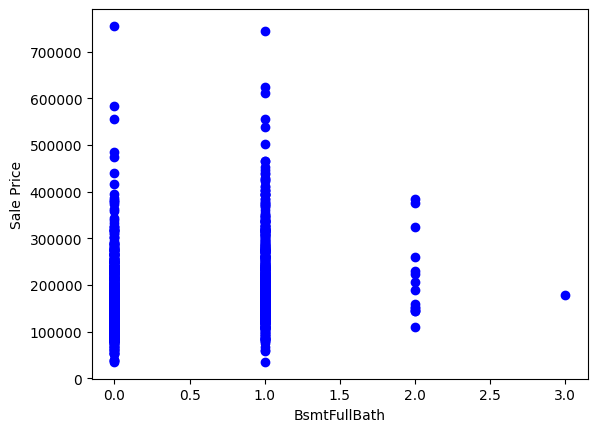

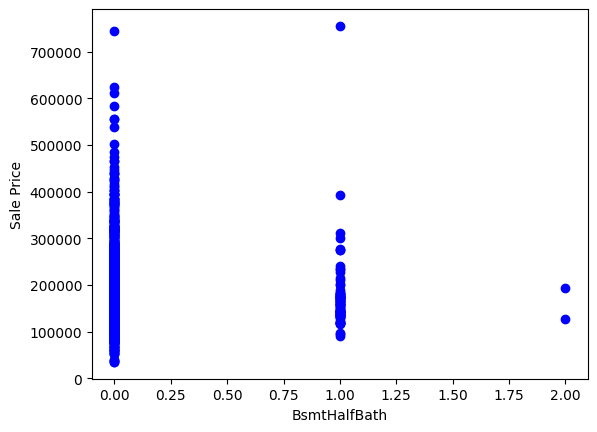

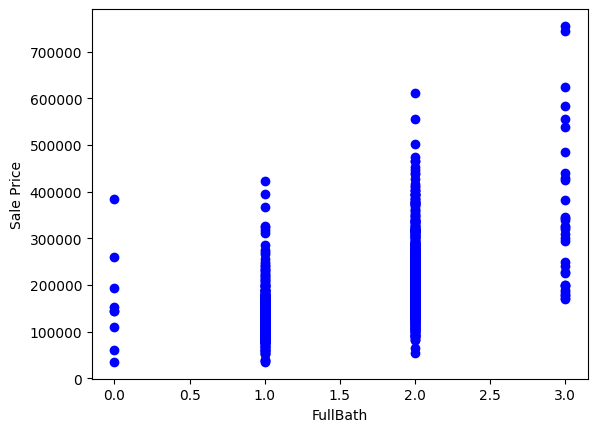

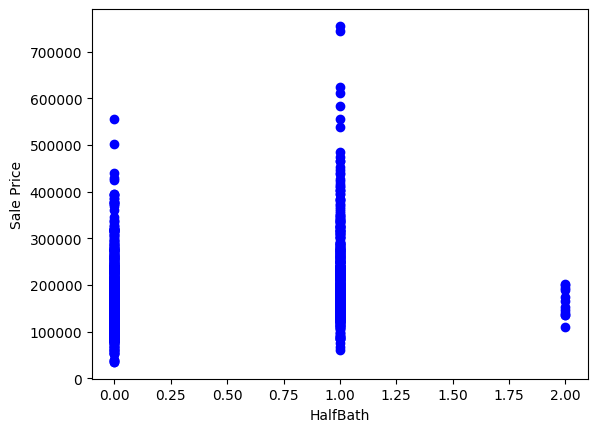

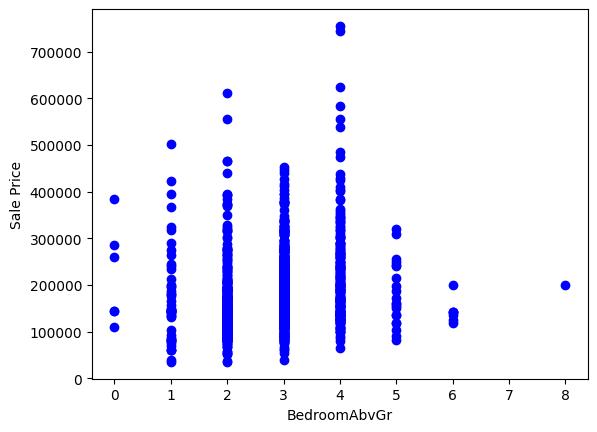

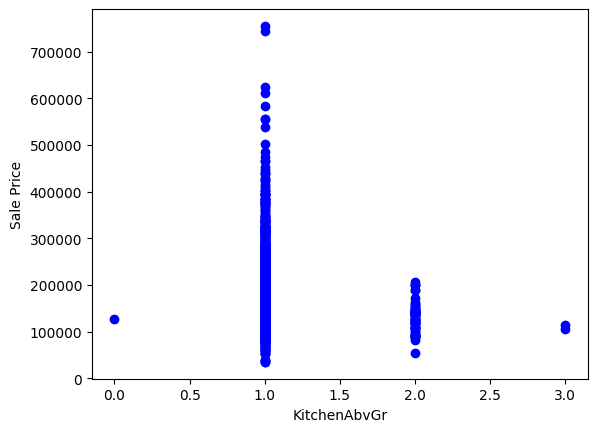

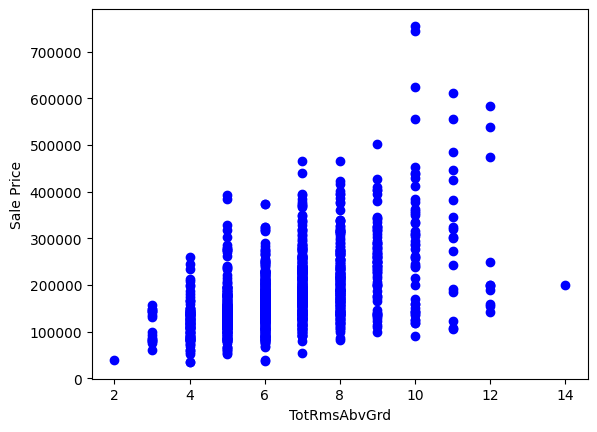

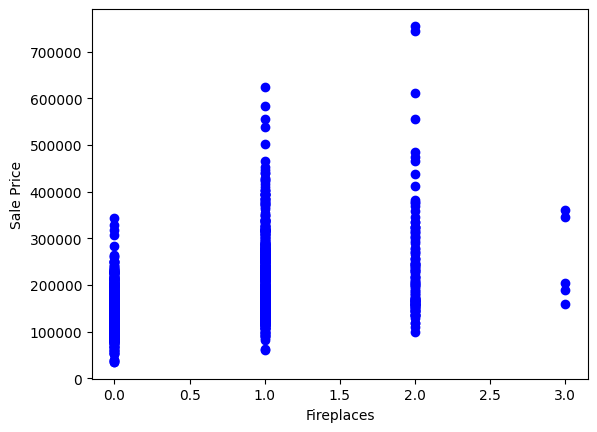

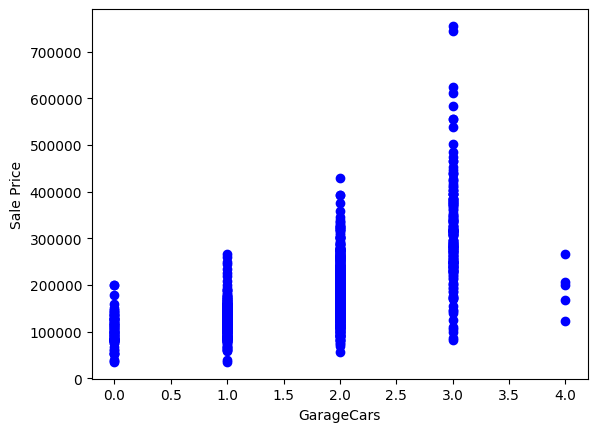

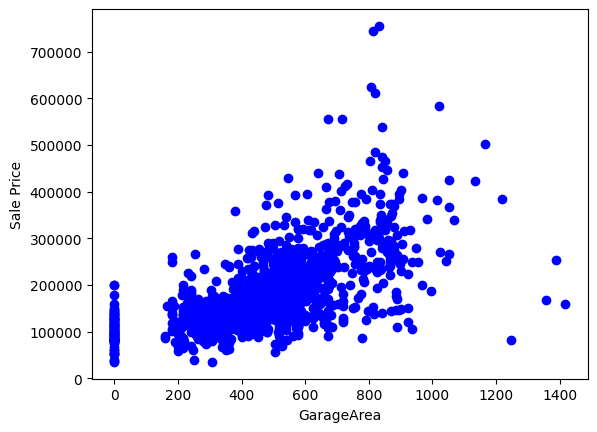

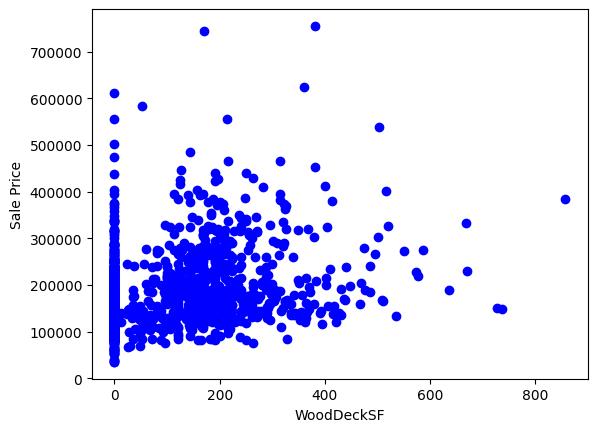

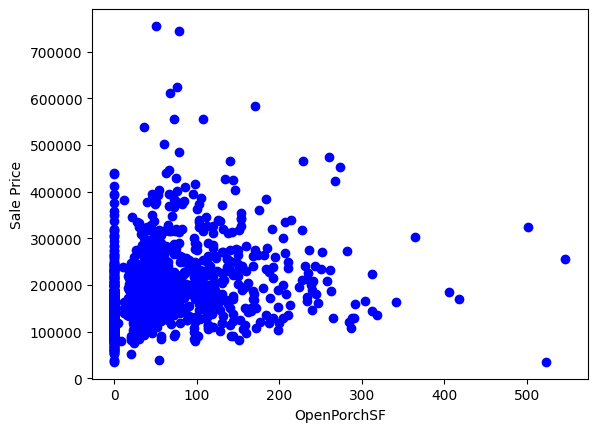

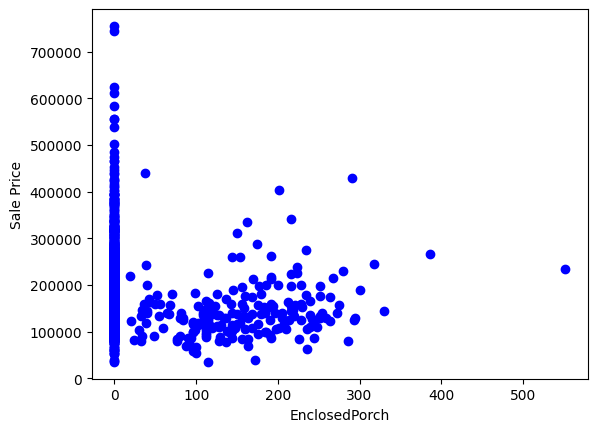

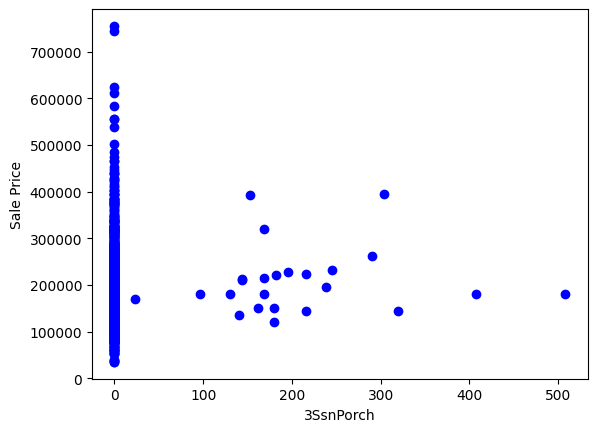

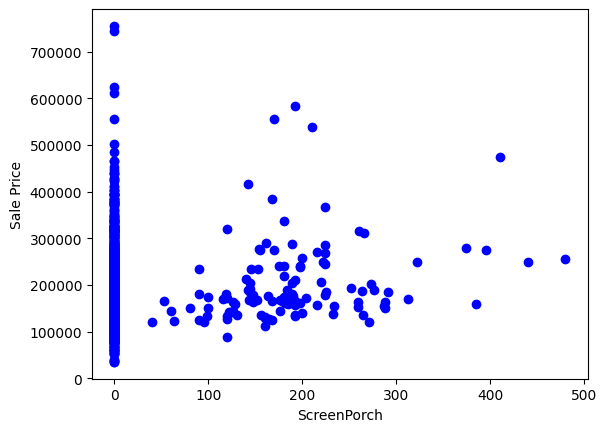

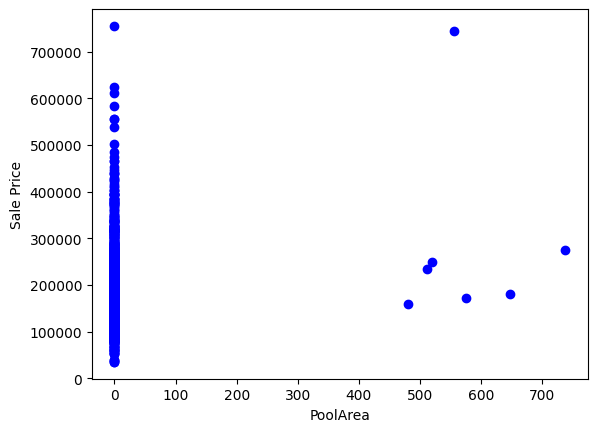

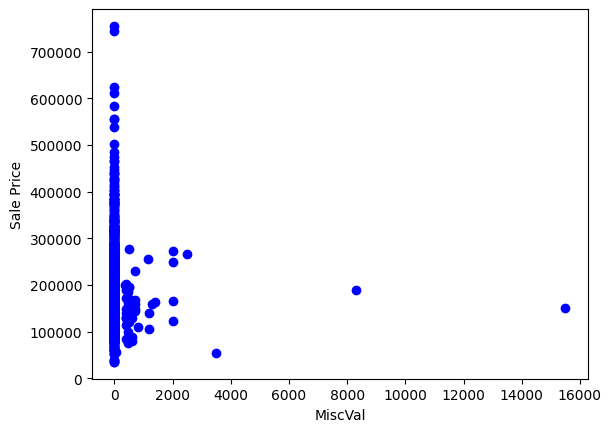

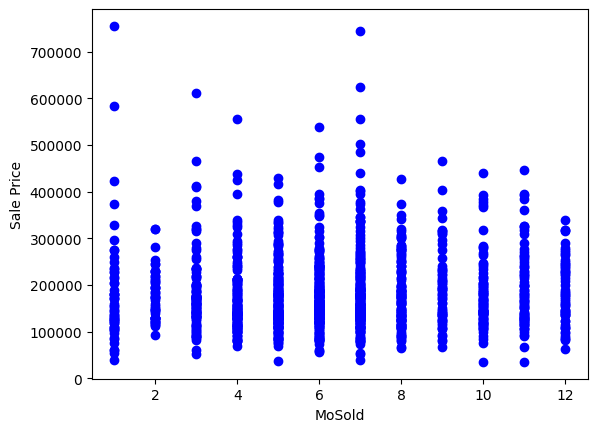

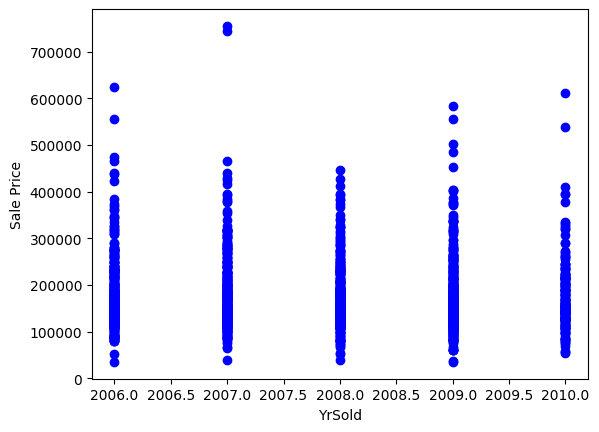

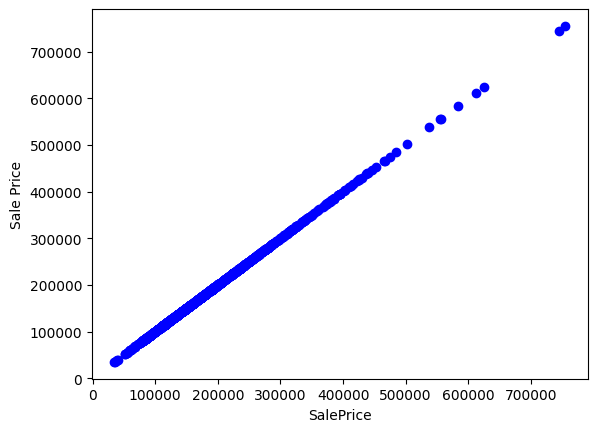

In [2]:
column_list = df.columns.values.tolist()
column_list = [col for col in column_list if df[col].dtype == 'int64']

int_l = df[column_list]

for col in column_list:
    plt.scatter(df[col], y, color='blue')
    plt.xlabel(col)
    plt.ylabel('Sale Price')
    plt.show()

# Simple Linear Regression

In [3]:
candidates = []
best_model = None
best_variable = 'OverallQual' # manually added in after running the code

for col in column_list:
    X = int_l[[col]].to_numpy()
    y = int_l.SalePrice.to_numpy()

    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)
    
    regressor = linear_model.LinearRegression()
    regressor.fit(X_train, y_train)

    y_test_ = regressor.predict(X_test)

    # first true, then predicted
    MSE = mean_squared_error(y_test, y_test_)
    r2 = r2_score(y_test, y_test_)
    
    if r2 > 0:
        '''print(f"{col}: R² = {r2:.3f}, MSE = {MSE:.2f}")
        print('Coefficients: ', regressor.coef_[0])
        print('Intercept: ', regressor.intercept_) '''
        candidates.append((col, r2, MSE))
        if col == 'OverallQual':
            best_model = regressor

candidates.sort(key=lambda x: x[1], reverse=True)
print('Based on R2', candidates)
candidates.sort(key=lambda x: x[2], reverse=False)
# print('Based on MSE', candidates)

# r2 = 0.661, mse = 2420651458

Based on R2 [('SalePrice', 1.0, 3.2550576915675746e-21), ('OverallQual', 0.6605902022752994, 2420651458.8103337), ('GrLivArea', 0.5846882349949316, 2961979991.620763), ('TotalBsmtSF', 0.4127862140415405, 4187975471.3705454), ('GarageCars', 0.3989112590672357, 4286930864.599119), ('1stFlrSF', 0.3878593808419768, 4365752234.305914), ('GarageArea', 0.3713667176961791, 4483376973.989842), ('TotRmsAbvGrd', 0.2884395848231829, 5074808590.017609), ('YearBuilt', 0.2777365752077686, 5151141848.553144), ('FullBath', 0.26362537122912055, 5251782156.303455), ('Fireplaces', 0.24964147335285958, 5351514524.140055), ('YearRemodAdd', 0.24229200739648837, 5403930499.188592), ('BsmtFinSF1', 0.17564236055293359, 5879272006.542206), ('2ndFlrSF', 0.15707465561890033, 6011695826.763753), ('WoodDeckSF', 0.1383893296166121, 6144958513.783981), ('OpenPorchSF', 0.12996428310890906, 6205045468.421508), ('HalfBath', 0.12161725088385245, 6264576029.61264), ('BsmtFullBath', 0.07406301660251802, 6603730135.821116), 

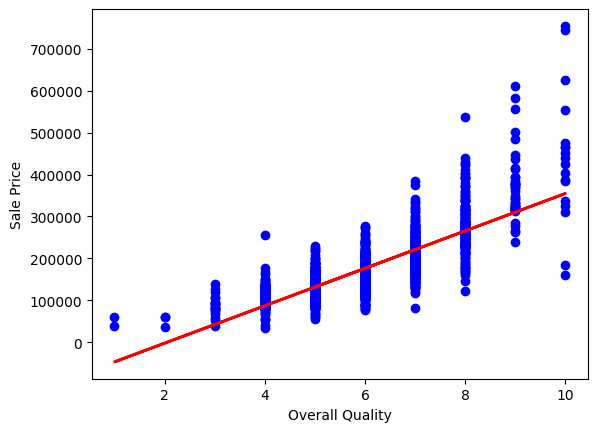

In [4]:
X = df['OverallQual'].to_numpy()
y = df['SalePrice'].to_numpy()

y_pred = best_model.coef_[0] * X + best_model.intercept_

plt.scatter(X, y, color='blue')
plt.plot(X, y_pred, color='red', linewidth=2)
plt.xlabel("Overall Quality")
plt.ylabel("Sale Price")
plt.show()

# Multiple Linear Regression

In [5]:
corr_matrix = int_l.corr()

correlations_with_target = corr_matrix['SalePrice']
high_corr_features = correlations_with_target[correlations_with_target.abs() >= 0.5].index

features = list(high_corr_features)
features.remove('SalePrice')

filtered_df = int_l[features]
print(filtered_df.corr())

              OverallQual  YearBuilt  YearRemodAdd  TotalBsmtSF  1stFlrSF  \
OverallQual      1.000000   0.572323      0.550684     0.537808  0.476224   
YearBuilt        0.572323   1.000000      0.592855     0.391452  0.281986   
YearRemodAdd     0.550684   0.592855      1.000000     0.291066  0.240379   
TotalBsmtSF      0.537808   0.391452      0.291066     1.000000  0.819530   
1stFlrSF         0.476224   0.281986      0.240379     0.819530  1.000000   
GrLivArea        0.593007   0.199010      0.287389     0.454868  0.566024   
FullBath         0.550600   0.468271      0.439046     0.323722  0.380637   
TotRmsAbvGrd     0.427452   0.095589      0.191740     0.285573  0.409516   
GarageCars       0.600671   0.537850      0.420622     0.434585  0.439317   
GarageArea       0.562022   0.478954      0.371600     0.486665  0.489782   

              GrLivArea  FullBath  TotRmsAbvGrd  GarageCars  GarageArea  
OverallQual    0.593007  0.550600      0.427452    0.600671    0.562022  
Year

In [6]:
# 2 Features

results = []
best_model_2 = None
best_scaler_2 = None
best_features_2 = ('OverallQual', 'GrLivArea')

for pair in combinations(features, 2):
    X = filtered_df[list(pair)].to_numpy()
    y = df.SalePrice.to_numpy()

    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)

    std_scaler = preprocessing.StandardScaler()
    X_train_std = std_scaler.fit_transform(X_train)
    X_test_std = std_scaler.transform(X_test)
    
    regressor = linear_model.LinearRegression()
    regressor.fit(X_train_std, y_train)
    
    y_pred = regressor.predict(X_test_std)
    r2 = r2_score(y_test, y_pred)

    if pair == ('OverallQual', 'GrLivArea'):
        best_model_2 = regressor
        best_scaler_2 = std_scaler
    
    results.append((pair, r2))

sorted_results = sorted(results, key=lambda x: x[1], reverse=True)

for pair, score in sorted_results[:10]:
    print(f"{pair}: R² = {score:.4f}")

('OverallQual', 'GrLivArea'): R² = 0.7827
('OverallQual', '1stFlrSF'): R² = 0.7262
('YearBuilt', 'GrLivArea'): R² = 0.7195
('OverallQual', 'TotalBsmtSF'): R² = 0.7125
('OverallQual', 'TotRmsAbvGrd'): R² = 0.7053
('TotalBsmtSF', 'GrLivArea'): R² = 0.6956
('GrLivArea', 'GarageCars'): R² = 0.6856
('OverallQual', 'GarageArea'): R² = 0.6840
('GrLivArea', 'GarageArea'): R² = 0.6802
('OverallQual', 'GarageCars'): R² = 0.6763


In [7]:
mult_regr_columns = ['OverallQual', 'YearBuilt', '1stFlrSF', 'GrLivArea', 'FullBath']

X = filtered_df[mult_regr_columns].to_numpy()
y = df.SalePrice.to_numpy()

std_scaler = preprocessing.StandardScaler()
X_std = std_scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_std,y,test_size=0.2,random_state=1)

regressor = linear_model.LinearRegression()
regressor.fit(X_train, y_train)

coef_ =  regressor.coef_
intercept_ = regressor.intercept_

means_ = std_scaler.mean_
std_devs_ = np.sqrt(std_scaler.var_)

coef_original = coef_ / std_devs_
intercept_original = intercept_ - np.sum((means_ * coef_) / std_devs_)

print ('Coefficients: ', coef_original)
print ('Intercept: ', intercept_original)

y_pred = regressor.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(r2, mae)

# r2 = 0.811, mae = 24874

Coefficients:  [23939.82042311   486.39739302    34.89635059    47.47473368
 -3233.33345519]
Intercept:  -1031909.1805498635
0.8111004966194413 24874.04507516773


In [8]:
'''
# Simple Linear Regression
test_X = test_set[[best_variable]].to_numpy()
test_predictions = best_model.predict(test_X)
'''

test_X = test_set[list(best_features_2)].to_numpy()
# test_X = test_set[mult_regr_columns].to_numpy()
std_scaler = best_scaler_2
test_X_std = std_scaler.transform(test_X)

test_predictions = best_model_2.predict(test_X_std)
# test_predictions = regressor.predict(test_X_std)
print(test_predictions)

output = pd.DataFrame({'Id': test_set.Id, 'SalePrice': test_predictions})
output.to_csv('submission.csv', index=False)

[112422.73721323 167801.86532171 150388.7692574  ... 129411.6301334
 116255.59720132 235508.29987836]
